# An IJulia Preview

This notebook is a preview demo of **IJulia**: a [Julia-language](http://julialang.org/) backend combined with the [IPython](http://ipython.org/) interactive environment.   This combination allows you to interact with the Julia language using IPython's powerful [graphical notebook](http://ipython.org/notebook.html), which combines code, formatted text, math, and multimedia in a single document.

* Note: this is a *preview*, because it relies on pre-release bleeding-edge versions of Julia, IPython, and several Julia packages, as explained on the [IJulia github page](https://github.com/JuliaLang/IJulia.jl), and functionality is evolving rapidly.  We hope to have a more polished release soon.

## Basic Julia interaction

Basic mathematical expressions work like you expect:

In [6]:
function f(x)
    y = x.^2;
    return y;
end
g = x -> x.^2

(anonymous function)

In [7]:
a = randn(3,3);
f(a) - g(a)

3x3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [29]:
a[:]

9-element Array{Float64,1}:
 -0.112644 
 -0.772488 
  0.172679 
 -0.0922463
  0.295773 
  0.73591  
  0.172949 
  0.797139 
  1.32277  

You can define variables, write loops, and execute arbitrary multiline code blocks.  Here is an example of an alternating harmonic series $\sum_{n=1}^\infty \frac{(-1)^n}{n}$ from a [Julia tutorial by Homer Reid](http://homerreid.ath.cx/teaching/18.330/JuliaProgramming.shtml#SimplePrograms):

In [2]:
s = 0.0
for n = 1:2:10000
    s += 1/n - 1/(n+1)
end
s # an expression on the last line (if it doesn't end with ";") is printed as "Out"

0.6930971830599458

Previous outputs can be referred to via `Out[`*n*`]`, following the IPython, for example `Out[2]` for the result above.  You can also use the shorthand `_2`, or `_` for the previous result, as in IPython.  Like in Matlab, `ans` can also be used to refer to the previous result, *even if it was not printed* (when the command ended with `;`).

For example, the harmonic series above should be converging (slowly) to $\ln 2$, and we can check this:

In [3]:
Out[2] - log(2)

-4.9997499999454575e-5

Like Matlab or Scipy + Numpy, Julia has lots of mathematical functions and linear algebra built in.  For example, we can define a $500\times500$ random matrix $R$ and form the positive-definite matrix $R^* R$:

In [5]:
R = rand(500,500)
R' * R  + 1

500x500 Array{Float64,2}:
 176.823  134.171  133.605  128.97   …  131.832  140.237  128.797  130.203
 134.171  178.431  133.187  130.039     130.756  139.909  133.399  133.329
 133.605  133.187  175.321  126.044     127.895  139.384  128.22   127.631
 128.97   130.039  126.044  167.221     122.407  134.698  125.822  126.318
 131.108  129.587  129.609  125.715     128.892  136.986  130.606  125.784
 124.509  128.229  127.388  120.704  …  127.665  133.017  123.582  122.957
 139.466  134.465  134.819  131.503     129.889  142.04   133.791  130.107
 127.433  128.528  126.477  121.89      125.627  129.983  126.212  122.738
 129.841  134.427  129.799  124.671     127.271  135.654  124.512  125.128
 136.525  136.118  131.637  126.53      130.56   138.127  131.584  131.009
 127.526  132.144  124.117  128.28   …  125.29   137.683  128.406  127.502
 128.645  132.295  126.274  119.687     123.766  136.288  124.935  124.505
 136.68   135.109  131.409  128.654     128.63   138.816  129.705  128.02 

(Notice that, by default, only a portion of a large matrix is shown.  You didn't really want to read $500^2 = 250,000$ numbers, did you?)

Standard output from Julia is also captured and sent to the IJulia notebook as you'd expect:

In [6]:
println("Hello world!\n")
println(STDERR, "Börk börk börk, some unicode output on stderr...\n")

Hello world!



Börk börk börk, some unicode output on stderr...



IJulia even captures output from external C libraries (and notice how easy it is using Julia's `ccall` intrinsic):

In [7]:
ccall(:printf, Cint, (Ptr{Uint8},), "Hello from C!!\n");

Hello from C!!


We can define functions, of course, and use them in later input cells:

In [8]:
f(x) = x + 1

f (generic function with 1 method)

In [9]:
println(f(3))
f([1,1,2,3,5,8])

4


6-element Array{Int64,1}:
 2
 2
 3
 4
 6
 9

Notice that the input above both printed an scalar to `STDOUT` and also returned a vector, the latter using Julia's ability to write polymorphic functions and built-in array operations.

On the other hand adding a string to a number is not defined (there is no `+` method defined for those types, although we could easily add one), and attempting to do so will throw an exception:

In [10]:
f("Hello?")

LoadError: `+` has no method matching +(::ASCIIString, ::Int64)
while loading In[10], in expression starting on line 1

## Julia–Python interoperability: SciPy and Matplotlib

Julia can easily and transparently call external Python code using a package called [PyCall](https://github.com/stevengj/PyCall.jl), and to illustrate that capability we will show some examples calling [SciPy](http://www.scipy.org/) and [Matplotlib](http://matplotlib.org/) from Julia.

For example, we can use the [Newton solver in scipy.optimize](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) to solve a transcendental equation $\cos(x) - x = 0$ given a *Julia* function:

In [13]:
using PyCall
@pyimport scipy.optimize as so
so.newton(x -> cos(x) - x, 1)

0.7390851332151607

We can use the same `@pyimport` syntax to import Matplotlib (specifically, the `matplotlib.pyplot` module), but to integrate Matplotlib's graphics with the IJulia display requires a little more work.  To simplify this, we've created a [PyPlot module](https://github.com/stevengj/PyPlot.jl) for Julia:

INFO: Loading help data...


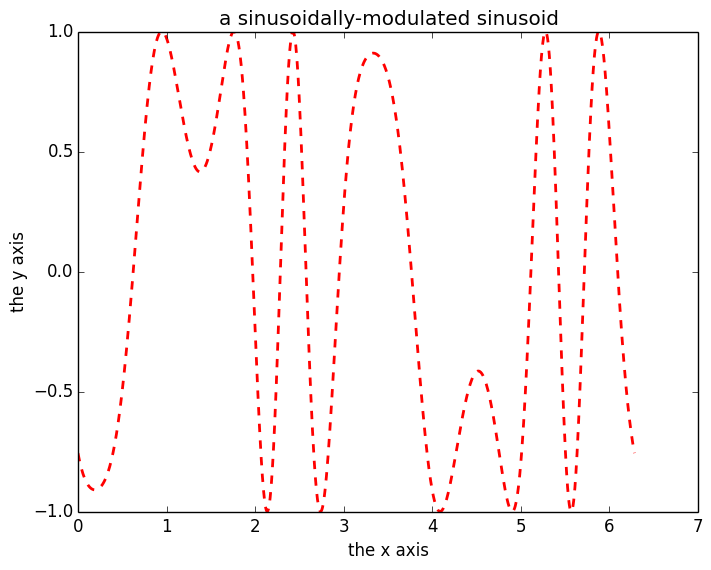

PyObject <matplotlib.text.Text object at 0x122e1cb90>

In [8]:
using PyPlot
x = linspace(0,2*pi,1000)
y = sin(3*x + 4*cos(2*x))
plot(x, y, color="red", linewidth=2.0, linestyle="--")
ylabel("the y axis")
xlabel("the x axis")
title("a sinusoidally-modulated sinusoid")

In [13]:
g = imread("nt_toolbox/data/hibiscus.bmp");

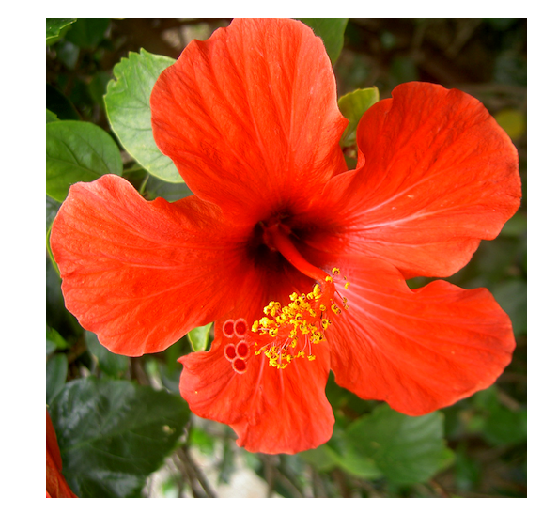

(-0.5,511.5,511.5,-0.5)

In [18]:
imshow(g, interpolation="nearest")
set_cmap("gray")
axis("off")

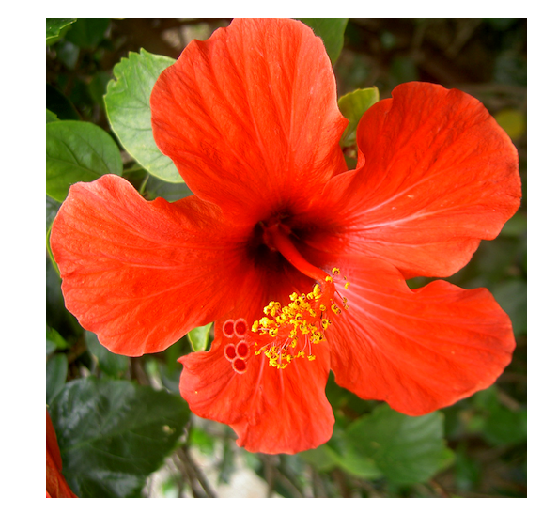

(-0.5,511.5,511.5,-0.5)

In [30]:
include("nt_toolbox/nt_signal.jl")
using nt_signal
imageplot(g)

Notice that, by default, the plots are displayed inline (just as for the `%pylab inline` "magic" in IPython).  This kind of multimedia display can be enabled for *any* Julia object, as explained in the next section.

## Multimedia display in IJulia

Like most programming languages, Julia has a built-in `print(x)` function for outputting an object `x` as text, and you can override the resulting text representation of a user-defined type by overloading Julia's `show` function.  The next version of Julia, however, will extend this to a more general mechanism to display **arbitrary multimedia representations** of objects, as defined by standard [MIME types](https://en.wikipedia.org/wiki/Internet_media_type).   More specifically, the Julia [multimedia I/O API](http://docs.julialang.org/en/latest/stdlib/base/#multimedia-i-o) provides:

* A `display(x)` function requests the richest available multimedia display of a Julia object x (with a `text/plain` fallback).
* Overloading `writemime` allows one to indicate arbitrary multimedia representations (keyed by standard MIME types) of user-defined types.
* Multimedia-capable display backends may be registered by subclassing a generic `Display` type.  IJulia provides one such backend which, thanks to the IPython notebook, is capable of displaying HTML, LaTeX, SVG, PNG, and JPEG media formats.

The last two points are critical, because they separate **multimedia export** (which is defined by functions associated with the originating Julia data) from **multimedia display** (defined by backends which know nothing about the source of the data).

Precisely these mechanism were used to create the inline PyPlot plots above.   To start with, the simplest thing is to provide the MIME type of the data when you call `display`, which allows you to pass "raw" data in the corresponding format:

In [11]:
display("text/html", """Hello <b>world</b> in <font color="red">HTML</font>!""")

Hello world in HTML !

However, it will be more common to attach this information to types, so that they display correctly automatically.  For example, let's define a simple `HTML` type in Julia that contains a string and automatically displays as HTML (given an HTML-capable backend such as IJulia):

In [12]:
type HTML
   s::String
end
import Base.writemime
writemime(io::IO, ::@MIME("text/html"), x::HTML) = print(io, x.s)

# methods for generic function writemime
writemime(io,::MIME{:text/plain},x) at multimedia.jl:31
writemime(io,m::String,x) at multimedia.jl:37
writemime(io::IO,m::MIME{:image/eps},f::PyPlotFigure) at /Users/stevenj/.julia/PyPlot/src/PyPlot.jl:67
writemime(io::IO,m::MIME{:application/pdf},f::PyPlotFigure) at /Users/stevenj/.julia/PyPlot/src/PyPlot.jl:67
writemime(io::IO,m::MIME{:image/png},f::PyPlotFigure) at /Users/stevenj/.julia/PyPlot/src/PyPlot.jl:67
... 4 methods not shown (use methods(writemime) to see them all)

Here, `writemime` is just a function that writes `x` in the corresponding format (`text/html`) to the I/O stream `io`.  The `@MIME` is a bit of magic to allow Julia's [multiple dispatch](http://en.wikipedia.org/wiki/Multiple_dispatch) to automatically select the correct `writemime` function for a given MIME type (here `"text/html"`) and object type (here `HTML`).  We also needed an `import` statement in order to add new methods to an existing function from another module.

This `writemime` definition is all that we need to make any object of type `HTML` display automatically as HTML text in IJulia:

In [13]:
x = HTML("<ul> <li> Hello from a bulleted list! </ul>")

HTML("<ul> <li> Hello from a bulleted list! </ul>")

In [14]:
display(x)
println(x)

HTML("<ul> <li> Hello from a bulleted list! </ul>")

HTML("<ul> <li> Hello from a bulleted list! </ul>")


Once this functionality becomes available in a Julia release, we expect that many Julia modules will provide rich representations of their objects for display in IJulia, and moreover that other backends will appear.  Not only can other backends (such as Tim Holy's [ImageView](https://github.com/timholy/ImageView.jl) package) provide more full-featured display of images etcetera than IJulia's inline graphics, but they can also add support for displaying MIME types not handled by the IPython notebook (such as video or audio).